In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

wk_incomes = pd.read_csv('Data/wk_incomes.csv')
wk_incomes= wk_incomes.drop('Unnamed: 0', 1)

In [2]:
wk_incomes['Income Level']= wk_incomes['Monthly Income']
level_1 = wk_incomes['Income Level'].quantile(.40)
level_2 = wk_incomes['Income Level'].quantile(.80)


In [3]:
#wk_incomes.loc[(wk_incomes['Monthly Income'] <= level_1, 'Income Level')] = 'Level 1'
#wk_incomes.loc[((wk_incomes['Monthly Income'] > level_1), 'Income Level')] = 'Level 2'
#wk_incomes

In [4]:
wk_incomes.loc[(wk_incomes['Monthly Income'] <= level_1, 'Income Level')] = 'Level 1'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_2) & (wk_incomes['Monthly Income'] > level_1), 'Income Level')] = 'Level 2'
wk_incomes.loc[((wk_incomes['Monthly Income'] > level_2), 'Income Level')] = 'Level 3'
wk_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income,Income Level
0,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0,Level 3
1,Ciudad de México,Hombre,31,Sí,Profesional,Informática,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,12000.0,Level 3
2,Ciudad de México,Mujer,26,Sí,Profesional,Derecho,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,8000.0,Level 2
3,Ciudad de México,Mujer,60,Sí,Preparatoria o bachillerato,NaN,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,25000.0,Level 3
4,Ciudad de México,Mujer,34,Sí,Profesional,Derecho,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,8000.0,Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126050,Zacatecas,Mujer,24,Sí,Secundaria,NaN,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,2150.0,Level 1
126051,Zacatecas,Hombre,62,Sí,Primaria,NaN,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0,Level 2
126052,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,NaN,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0,Level 2
126053,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,NaN,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0,Level 2


In [5]:
y = wk_incomes['Income Level']
X = wk_incomes.drop(columns=['Monthly Income', 'Income Level'], axis=1)

rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
X = pd.get_dummies(X[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [6]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.5312690060025914


In [7]:
## with gini
target = wk_incomes['Income Level']
data = wk_incomes.drop(columns=['Monthly Income', 'Income Level'], axis=1)


rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
data = pd.get_dummies(data[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)

# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

[[8899 3227  747]
 [4386 6211 1841]
 [1362 2473 2368]]
              precision    recall  f1-score   support

     Level 1       0.61      0.69      0.65     12873
     Level 2       0.52      0.50      0.51     12438
     Level 3       0.48      0.38      0.42      6203

    accuracy                           0.55     31514
   macro avg       0.54      0.52      0.53     31514
weighted avg       0.55      0.55      0.55     31514

Testing Accuracy for Decision Tree Classifier: 55.46%


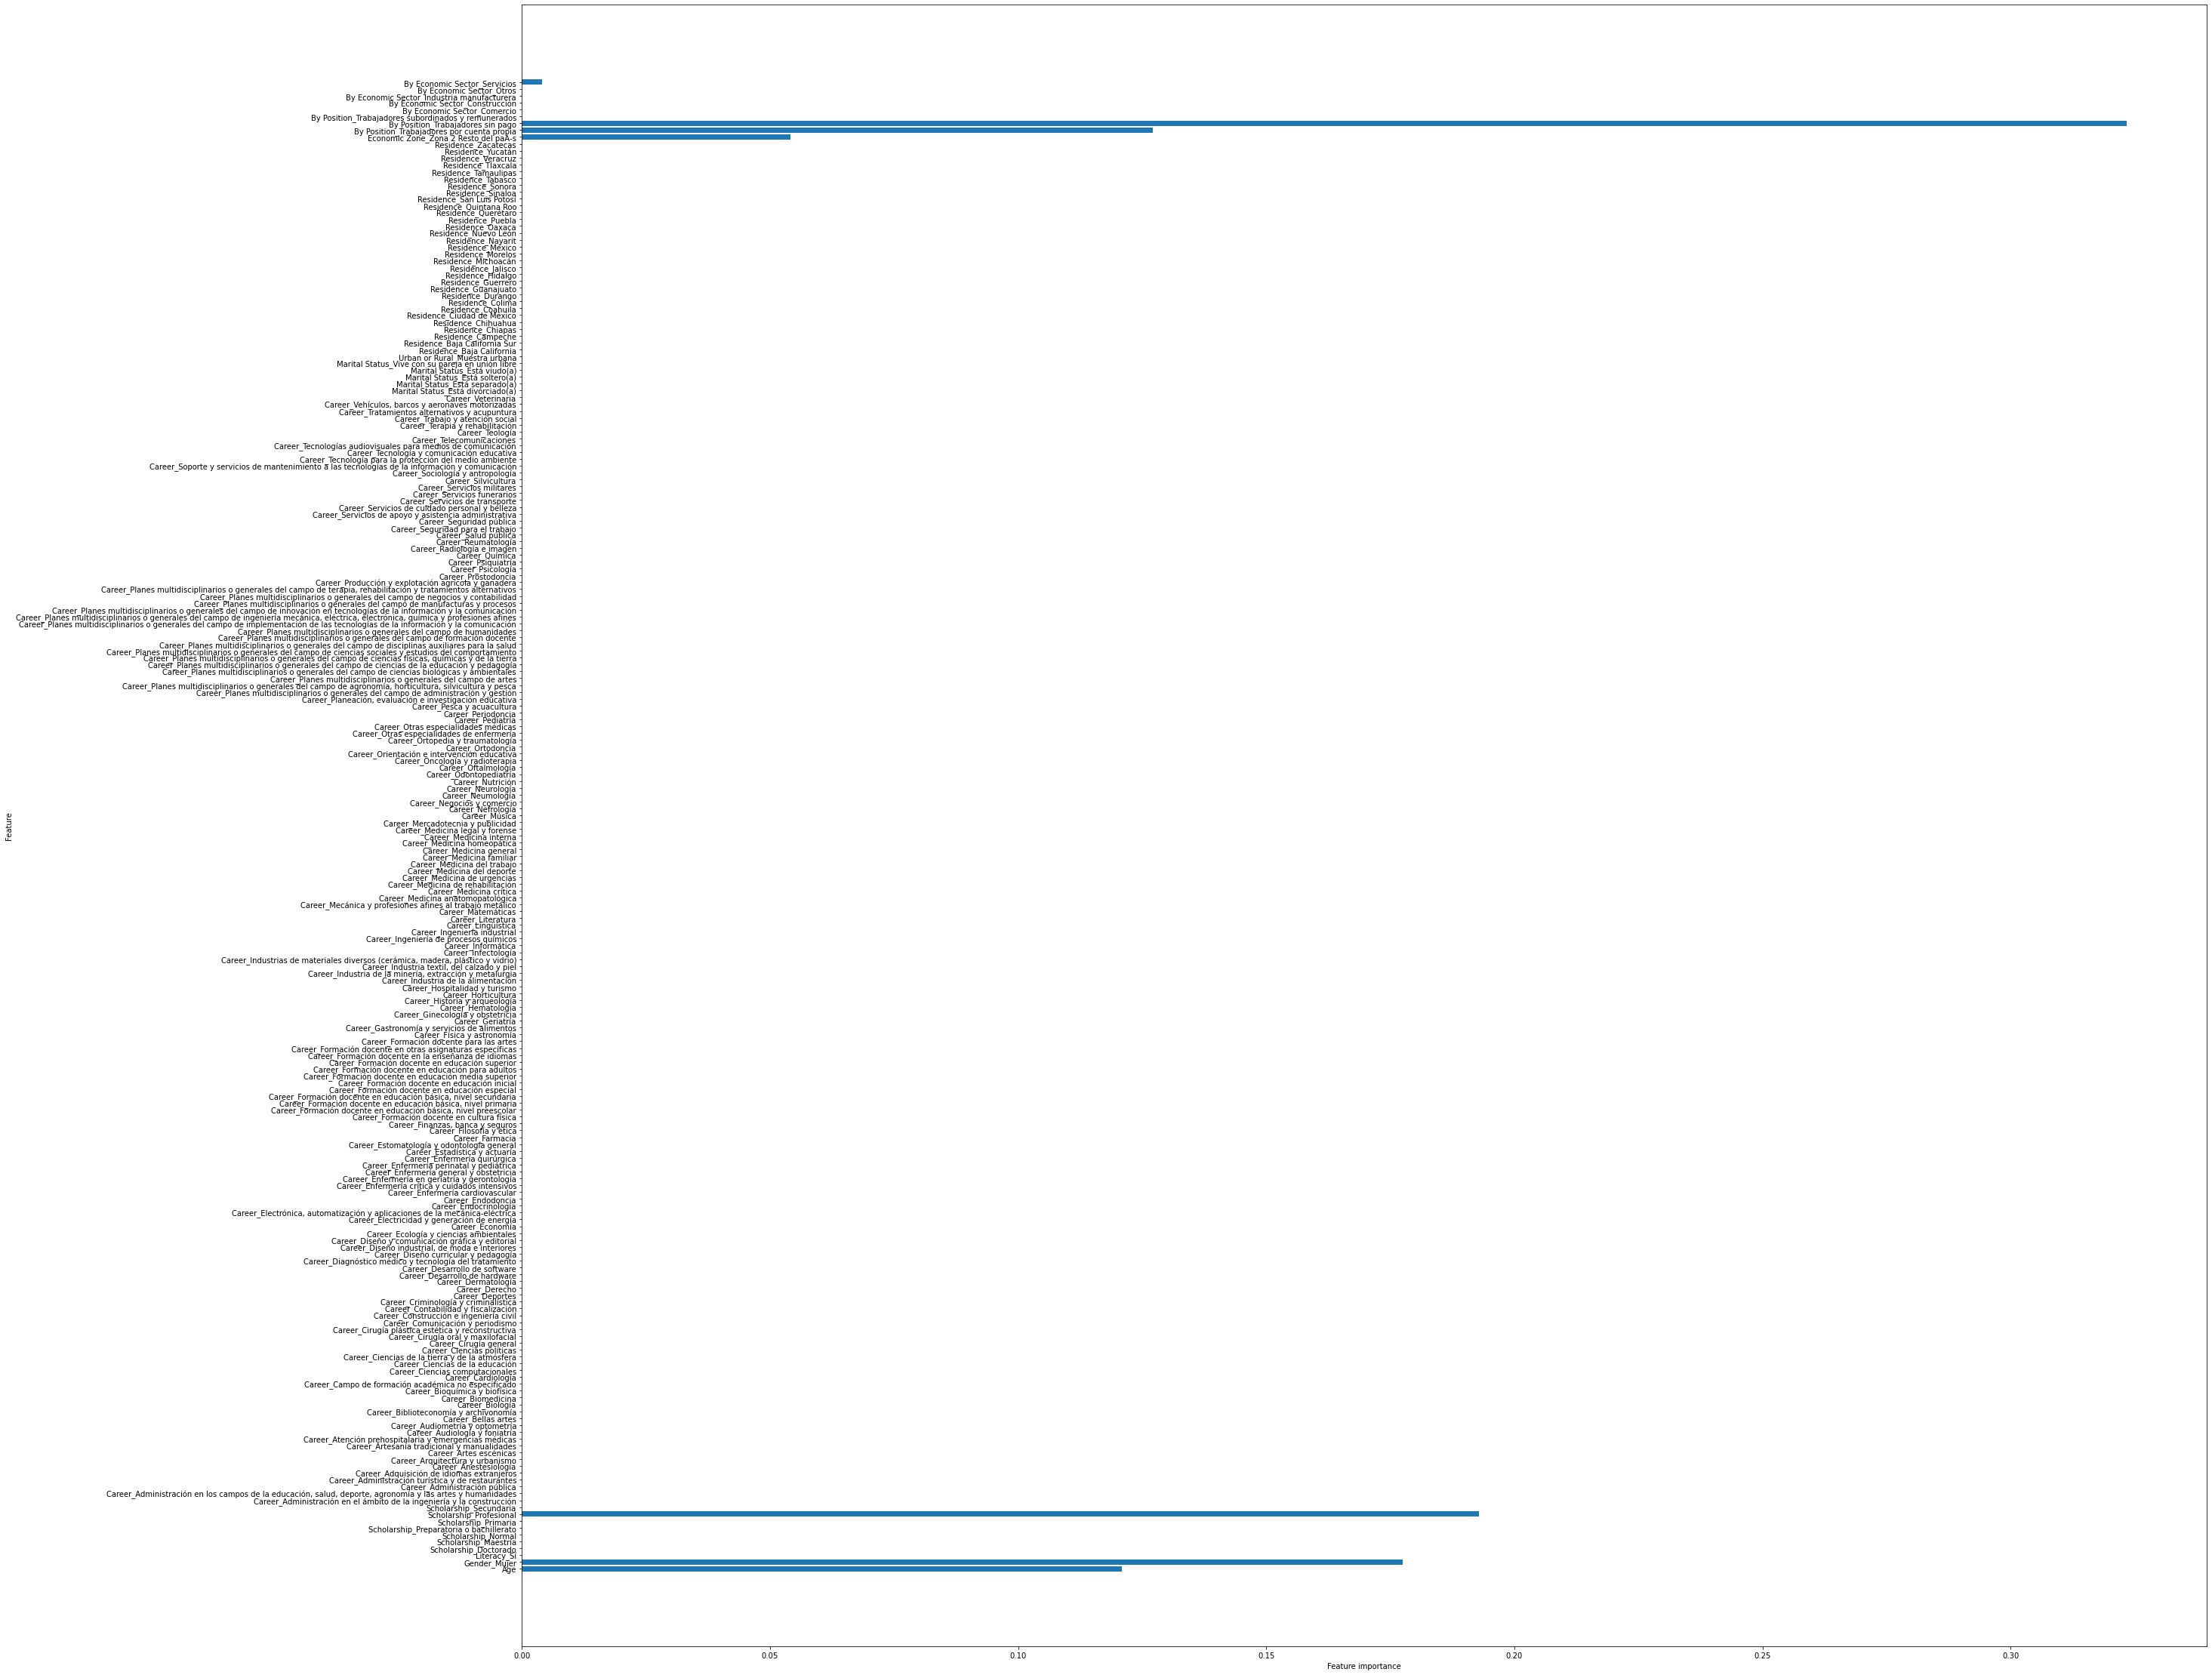

In [8]:
# Feature importance
tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(40,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [9]:
## Bagging

# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=50)
# Fit to the training data
bagged_tree.fit(data_train, target_train)

# Training accuracy score
bagged_tree.score(data_train, target_train)

0.562486117134365

In [10]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.554737576949927

In [11]:
## Random Forest

# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)
# Training accuracy score
forest.score(data_train, target_train)

0.5595244391322284

In [12]:
# Test accuracy score
forest.score(data_test, target_test)

0.5541664022339278

## Prunning

In [13]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100) 
tree_clf2.fit(data_train, target_train)

tree_clf2.score(data_train, target_train)

0.6139029627357443

In [14]:
tree_clf2.score(data_test, target_test)

0.5993526686552009

In [15]:
# Instantiate a BaggingClassifier
bagged_tree2 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree2.fit(data_train, target_train)

# Training accuracy score
bagged_tree2.score(data_train, target_train)

0.6112586073766937

In [16]:
# Test accuracy score
bagged_tree2.score(data_test, target_test)

0.6016056355905312